In [1]:
#Importing important libraries and modules

import nltk
import copy
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Segmentation

def segmentation(text):
    segments=nltk.sent_tokenize(text)
    return segments

In [3]:
#Tokenization

def tokenization(segments):
    tokens=[]
    i=0
    for seg in segments:
        tok=nltk.word_tokenize(seg.lower())
        tokens.append(tok)
    return tokens

In [4]:
#Stopwords

sw=stopwords.words("english")
no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn',
                "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
                "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
                'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
                'weren', "weren't", "won't", 'wouldn', "wouldn't"]
for i in sw:
    if i in no_stopwords:
        sw.remove(i)

def removal_of_stopwords(tokens):
    filtered_tokens=copy.deepcopy(tokens)
    for i in range(len(filtered_tokens)):
        for j in filtered_tokens[i]:
            if j in sw:
                filtered_tokens[i].remove(j)

    return filtered_tokens

In [5]:
#Removal of punctuation marks

def removal_of_punctuation_marks(filtered_tokens):
    filtered_tokens_without_punctuation=copy.deepcopy(filtered_tokens)
    for i in range(len(filtered_tokens_without_punctuation)):
        for j in filtered_tokens_without_punctuation[i]:
            if j.isalnum()==False:
                filtered_tokens_without_punctuation[i].remove(j)

    return filtered_tokens_without_punctuation

In [6]:
#Stemming and Lemmatizing

def stemming(filtered_tokens_without_punctuation):
    stemmer=PorterStemmer()
    stemmed_tokens=copy.deepcopy(filtered_tokens_without_punctuation)
    for i in range(len(stemmed_tokens)):
        stemmed_tokens[i]=[stemmer.stem(word) for word in stemmed_tokens[i]]
    
    return stemmed_tokens

def lemmatizing(stemmed_tokens):
    lemmatizer=WordNetLemmatizer()
    lemmatized_tokens=copy.deepcopy(stemmed_tokens)
    for i in range(len(lemmatized_tokens)):
        lemmatized_tokens[i]=[lemmatizer.lemmatize(word.lower(),'v') for word in lemmatized_tokens[i]]

    return lemmatized_tokens

In [7]:
#Cleaning the text

def clean_text(text):
    #segmentation
    segments=segmentation(text)

    #tokenization
    tokens=tokenization(segments)

    #removal of stopwords
    filtered_tokens=removal_of_stopwords(tokens)

    #removal of punctuation marks
    filtered_tokens_without_punctuation=removal_of_punctuation_marks(filtered_tokens)

    #stemming & lemmatizing
    stemmed_tokens=stemming(filtered_tokens_without_punctuation)
    lemmatized_tokens=lemmatizing(stemmed_tokens)
    lemmatized_tokens=lemmatizing(filtered_tokens_without_punctuation)

    for i in range(len(lemmatized_tokens)):
        lemmatized_tokens[i]=' '.join(lemmatized_tokens[i])
    
    cleaned_text=' '.join(lemmatized_tokens)
    return cleaned_text

In [8]:
#reading the csv file
df=pd.read_csv("/Users/mandi/Desktop/BCS_Project/stress_detection.csv")

In [13]:
#cleaning the text in the dataframe
df['cleaned_text']=df['text'].apply(lambda x:clean_text(x))

#splitting the data into training and testing sets
data_train,data_test,label_train,label_test=train_test_split(df['cleaned_text'],df['label'],test_size=0.15)

#vectorizing the text data
vectorizer=TfidfVectorizer()
data_train_vec=vectorizer.fit_transform(data_train)
data_test_vec=vectorizer.transform(data_test)

#using Logistic Regression
model=LogisticRegression(C=0.1)
model.fit(data_train_vec, label_train)

#predicting on the testing set
predictions=model.predict(data_test_vec)

#evaluating the model
accuracy=accuracy_score(label_test, predictions)
report=classification_report(label_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:-")
print(report)

Accuracy: 0.78
Classification Report:-
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       206
           1       0.74      0.89      0.81       220

    accuracy                           0.78       426
   macro avg       0.80      0.78      0.78       426
weighted avg       0.80      0.78      0.78       426



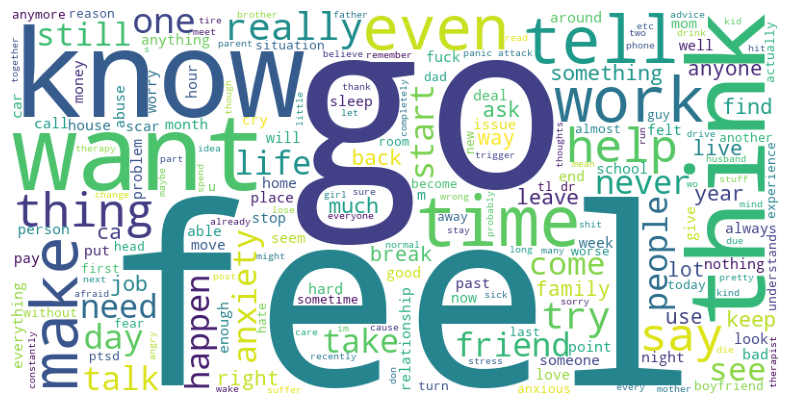

In [14]:
#generating positive wordcloud

positive_df=df[df['label']==1]
cleaned_txt=positive_df['cleaned_text'].tolist()
all_text=' '.join(cleaned_txt)

wordcloud=WordCloud(width=800,height=400,background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

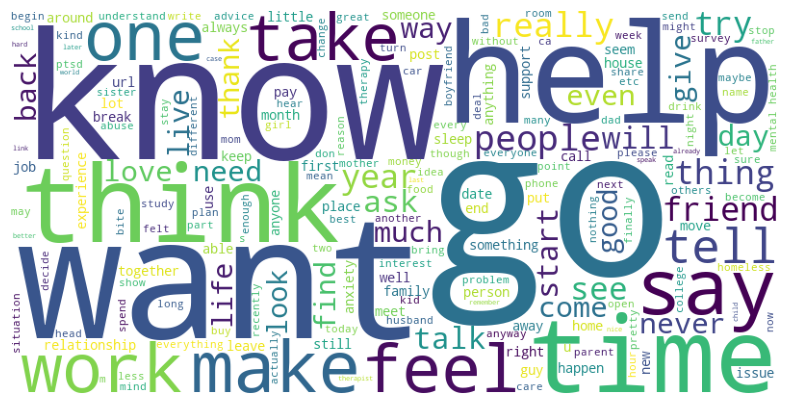

In [15]:
#generating negative wordcloud

negative_df=df[df['label']==0]
cleaned_txt=negative_df['cleaned_text'].tolist()
all_text=' '.join(cleaned_txt)

wordcloud=WordCloud(width=800,height=400,background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
#checking on new inputs
st=input('Enter some text:')

#cleaning the input
revised_text=clean_text(st)

#vectorizing
vectorized_st=vectorizer.transform(revised_text.split())

#predicting
prediction=model.predict(vectorized_st)

if prediction[0]==1:
    print('Positive')
else:
    print('Negative')

Negative
